In [5]:
#IMAGE SEGMENTATION USING  ADAPTATIVE THRESHOLDING AND CONTOUR TECHNIQUE

In [23]:
import cv2
import os

# Function to perform ball object segmentation with enhancements
def segment_balls(image):
    # Convert the image to grayscale
    gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)

    # Apply Gaussian blur to reduce noise
    blurred = cv2.GaussianBlur(gray, (5, 5), 0)

    # Apply adaptive thresholding to obtain a binary image
    binary = cv2.adaptiveThreshold(blurred, 255, cv2.ADAPTIVE_THRESH_GAUSSIAN_C, cv2.THRESH_BINARY_INV, 11, 2)

    # Perform morphological closing to remove small holes and gaps
    kernel = cv2.getStructuringElement(cv2.MORPH_ELLIPSE, (5, 5))
    closed = cv2.morphologyEx(binary, cv2.MORPH_CLOSE, kernel)

    # Find contours in the binary image
    contours, _ = cv2.findContours(closed, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)

    # Filter contours based on area to remove small noise
    min_contour_area = 100
    filtered_contours = [cnt for cnt in contours if cv2.contourArea(cnt) > min_contour_area]

    # Draw contours on the original image
    segmented_image = image.copy()
    cv2.drawContours(segmented_image, filtered_contours, -1, (0, 255, 0), 2)

    return segmented_image

# Load the dataset
dataset_dir = 'C:/Users/E-TIME/Desktop/ball_frames'

# Create output directories for segmented images and ground truth images
segmented_images_dir = 'C:/Users/E-TIME/segmented_images'
ground_truths_dir = 'C:/Users/E-TIME/ground_truths'

# Create directories if they do not exist
os.makedirs(segmented_images_dir, exist_ok=True)
os.makedirs(ground_truths_dir, exist_ok=True)

# Process each image in the dataset directory
for filename in os.listdir(dataset_dir):
    if filename.endswith('.jpg') or filename.endswith('.png'):
        # Load the image
        image_path = os.path.join(dataset_dir, filename)
        image = cv2.imread(image_path)
        
        # Perform enhanced ball object segmentation
        segmented_image = segment_balls(image)
        
        # Determine if it's a segmented image or ground truth image based on filename
        if '_GT.png' in filename:
            # Save the ground truth image
            output_path = os.path.join(ground_truths_dir, filename)
        else:
            # Save the segmented image
            output_path = os.path.join(segmented_images_dir, filename)
        
        # Write the image to the appropriate directory
        cv2.imwrite(output_path, segmented_image)

        print(f"Image saved: {output_path}")

# Print the current working directory
print("Current working directory:", os.getcwd())

print("Segmentation and ground truth separation complete.")



Image saved: C:/Users/E-TIME/segmented_images\frame-100.png
Image saved: C:/Users/E-TIME/ground_truths\frame-100_GT.png
Image saved: C:/Users/E-TIME/segmented_images\frame-101.png
Image saved: C:/Users/E-TIME/ground_truths\frame-101_GT.png
Image saved: C:/Users/E-TIME/segmented_images\frame-102.png
Image saved: C:/Users/E-TIME/ground_truths\frame-102_GT.png
Image saved: C:/Users/E-TIME/segmented_images\frame-103.png
Image saved: C:/Users/E-TIME/ground_truths\frame-103_GT.png
Image saved: C:/Users/E-TIME/segmented_images\frame-104.png
Image saved: C:/Users/E-TIME/ground_truths\frame-104_GT.png
Image saved: C:/Users/E-TIME/segmented_images\frame-105.png
Image saved: C:/Users/E-TIME/ground_truths\frame-105_GT.png
Image saved: C:/Users/E-TIME/segmented_images\frame-106.png
Image saved: C:/Users/E-TIME/ground_truths\frame-106_GT.png
Image saved: C:/Users/E-TIME/segmented_images\frame-107.png
Image saved: C:/Users/E-TIME/ground_truths\frame-107_GT.png
Image saved: C:/Users/E-TIME/segmented_i

In [7]:
#DICE SIMILARITY FOR EACH IMAGE AND SHOWING BAR GRAPH 

Best 5 Segmented Ball Images:


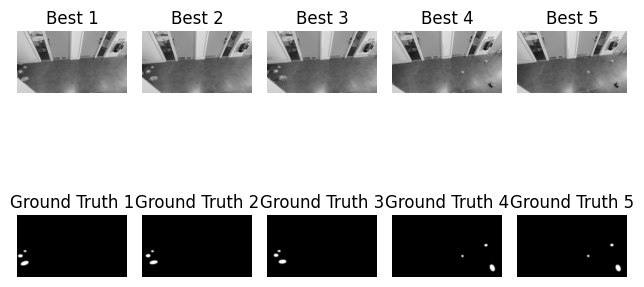

Worst 5 Segmented Ball Images:


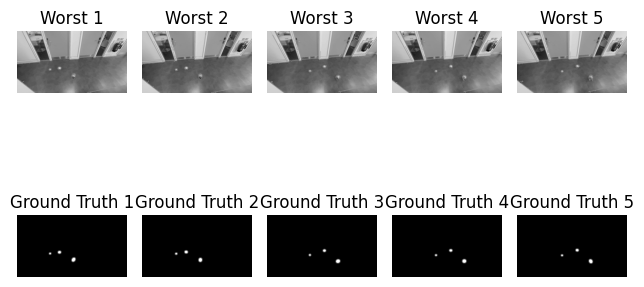

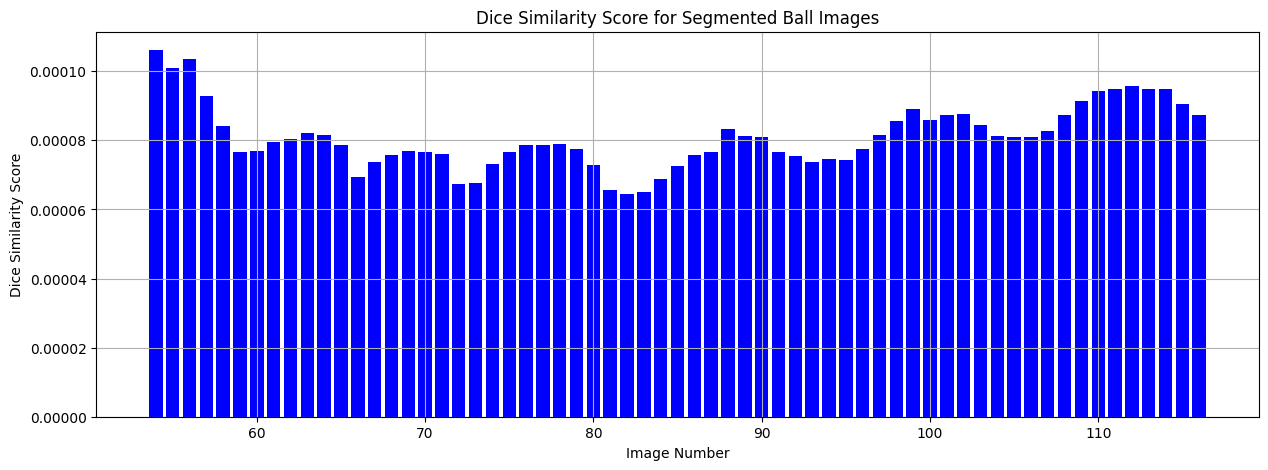

Mean Dice Similarity Score: 8.107600212480435e-05
Standard Deviation of Dice Similarity Scores: 9.116343884359062e-06


In [27]:
import cv2
import os
import numpy as np
import matplotlib.pyplot as plt

# Function to calculate Dice Similarity Score (DS)
def dice_similarity_score(segmented_mask, ground_truth_mask):
    intersection = np.logical_and(segmented_mask, ground_truth_mask)
    dice_score = (2 * np.sum(intersection)) / (np.sum(segmented_mask) + np.sum(ground_truth_mask))
    return dice_score

# Load the segmented images and ground truth masks
segmented_dir = 'C:/Users/E-TIME/segmented_images'
ground_truth_dir = 'C:/Users/E-TIME/ground_truths'  # Assuming ground truths are in the same directory

# Initialize lists to store DS scores
dice_scores = []

# Process each segmented image and its corresponding ground truth mask
best_images = []
worst_images = []
for i in range(54, 117):  # Process images from 54 to 116
    filename = f"frame-{i}.png"

    # Load segmented image
    segmented_path = os.path.join(segmented_dir, filename)
    segmented_image = cv2.imread(segmented_path, cv2.IMREAD_GRAYSCALE)
    if segmented_image is None:
        print(f"Error: Could not load segmented image for {filename}")
        continue

    # Load corresponding ground truth mask
    gt_filename = f"frame-{i}_GT.png"
    gt_path = os.path.join(ground_truth_dir, gt_filename)
    ground_truth_mask = cv2.imread(gt_path, cv2.IMREAD_GRAYSCALE)
    if ground_truth_mask is None:
        print(f"Error: Could not load ground truth mask for {gt_filename}")
        continue

    # Calculate Dice Similarity Score
    ds = dice_similarity_score(segmented_image, ground_truth_mask)
    dice_scores.append(ds)

    # Append images for best and worst categories
    if i in [111, 112, 55, 56, 54]:  # Best 5
        best_images.append((segmented_image, ground_truth_mask))
    elif i in [82, 83, 81, 72, 73]:  # Worst 5
        worst_images.append((segmented_image, ground_truth_mask))

# Visualize best segmented images and their ground truth masks
print("Best 5 Segmented Ball Images:")
for idx, (segmented_img, gt_mask) in enumerate(best_images, 1):
    plt.subplot(2, 5, idx)
    plt.imshow(segmented_img, cmap='gray')
    plt.title(f'Best {idx}')
    plt.axis('off')
    plt.subplot(2, 5, idx+5)
    plt.imshow(gt_mask, cmap='gray')
    plt.title(f'Ground Truth {idx}')
    plt.axis('off')
plt.tight_layout()
plt.show()

# Visualize worst segmented images and their ground truth masks
print("Worst 5 Segmented Ball Images:")
for idx, (segmented_img, gt_mask) in enumerate(worst_images, 1):
    plt.subplot(2, 5, idx)
    plt.imshow(segmented_img, cmap='gray')
    plt.title(f'Worst {idx}')
    plt.axis('off')
    plt.subplot(2, 5, idx+5)
    plt.imshow(gt_mask, cmap='gray')
    plt.title(f'Ground Truth {idx}')
    plt.axis('off')
plt.tight_layout()
plt.show()

# Generate bar graph for segmented images
plt.figure(figsize=(15, 5))
plt.bar(range(54, 117), dice_scores, color='blue')
plt.xlabel('Image Number')
plt.ylabel('Dice Similarity Score')
plt.title('Dice Similarity Score for Segmented Ball Images')
plt.grid(True)
plt.show()

# Calculate mean and standard deviation of DS scores
mean_ds = np.mean(dice_scores)
std_dev_ds = np.std(dice_scores)

print("Mean Dice Similarity Score:", mean_ds)
print("Standard Deviation of Dice Similarity Scores:", std_dev_ds)



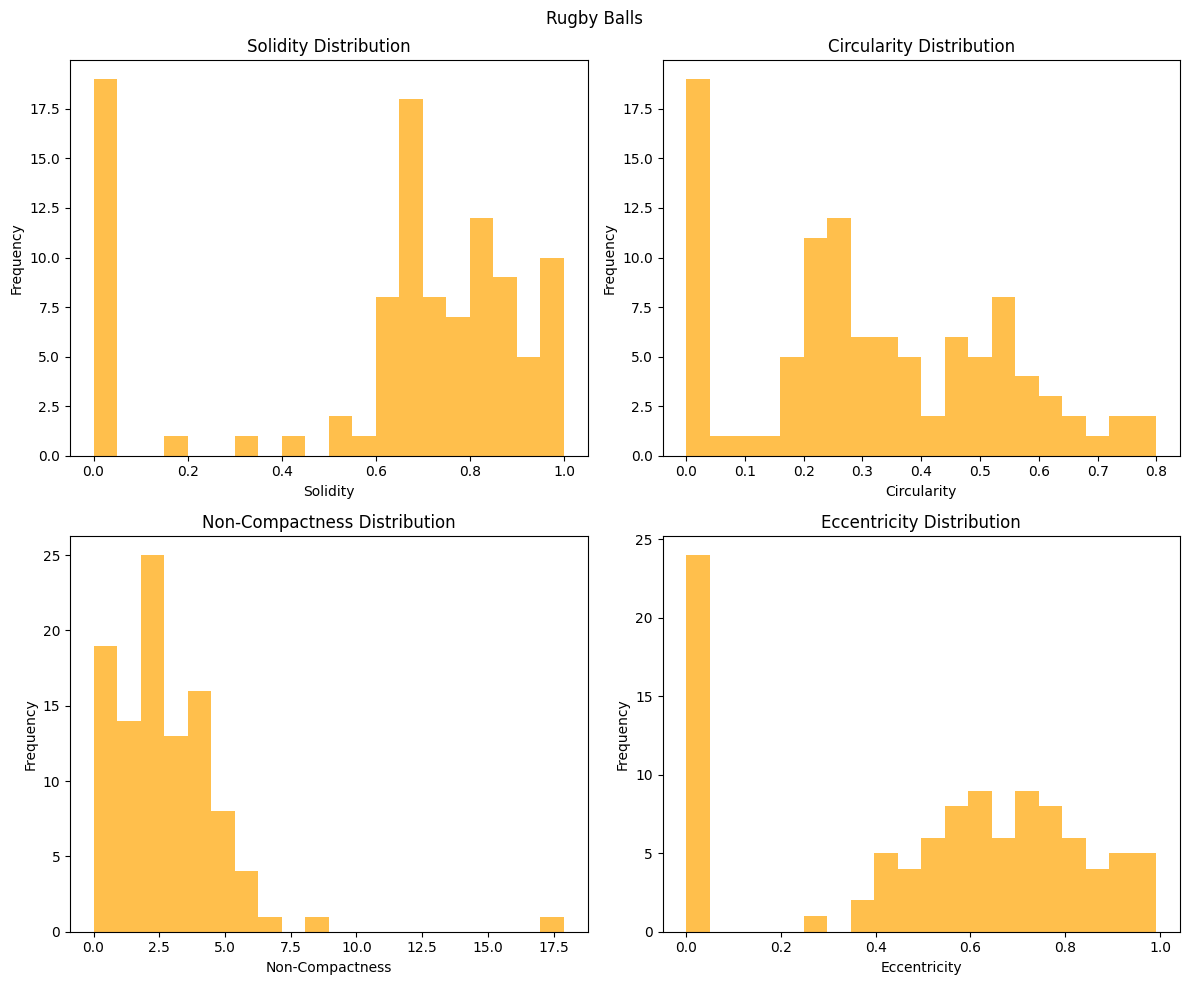

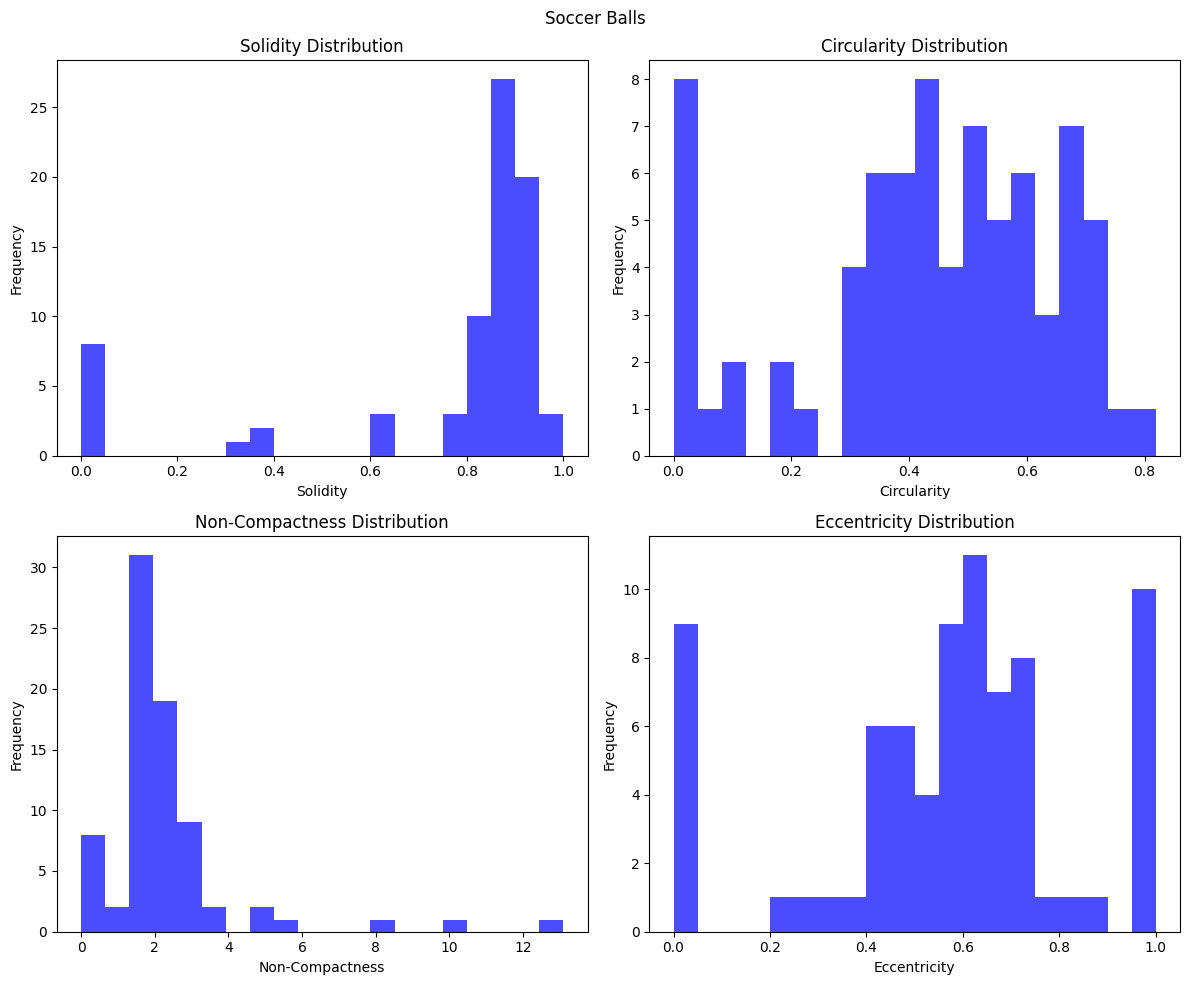

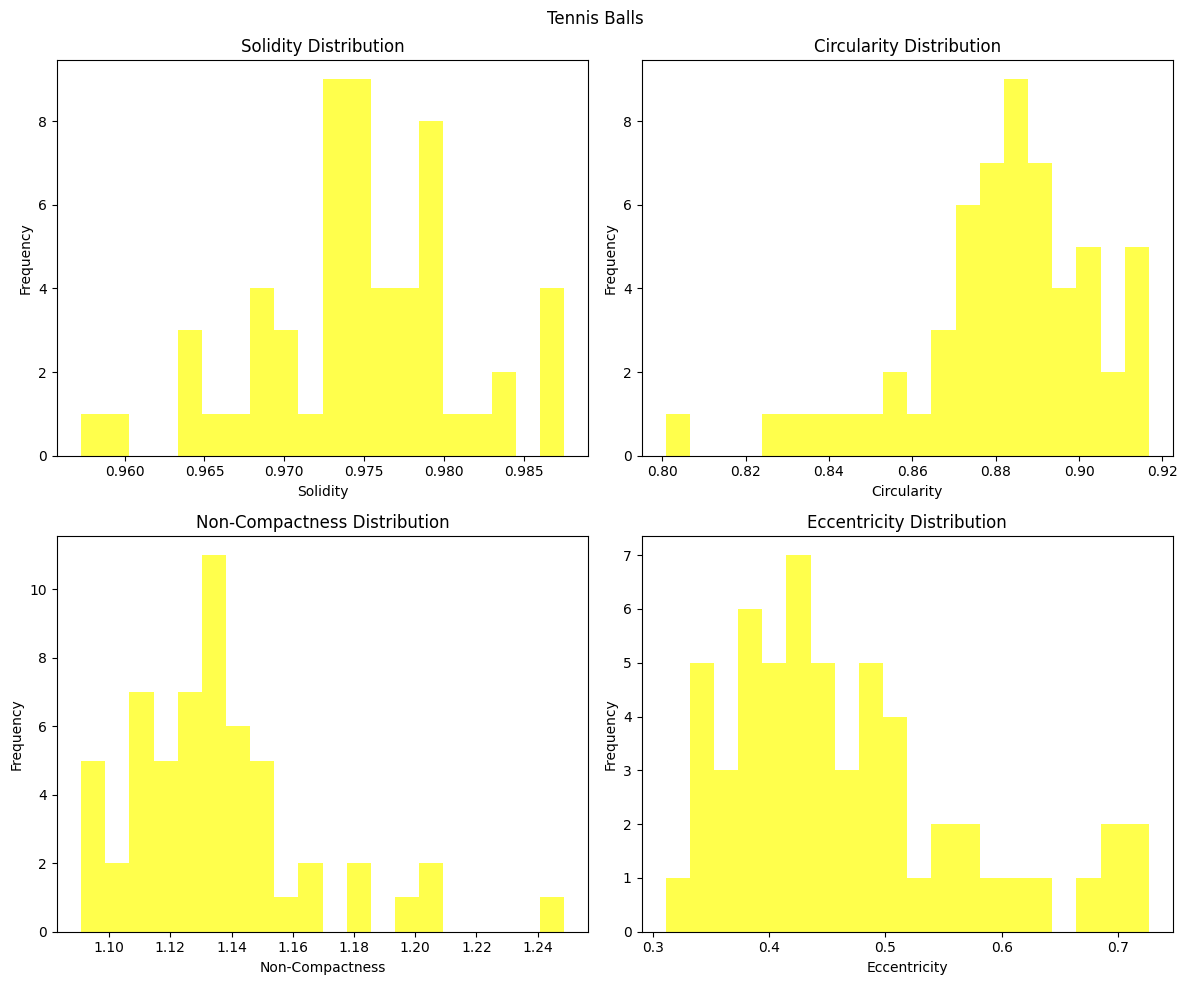

In [55]:
import cv2
import numpy as np
import os
import matplotlib.pyplot as plt

# Function to calculate shape features for a contour
def calculate_shape_features(contour):
    # Calculate solidity
    area = cv2.contourArea(contour)
    hull = cv2.convexHull(contour)
    hull_area = cv2.contourArea(hull)
    
    # Add a check to prevent division by zero
    if hull_area == 0:
        solidity = 0
    else:
        solidity = area / hull_area

    # Calculate circularity
    perimeter = cv2.arcLength(contour, True)
    if perimeter == 0:
        circularity = 0
    else:
        circularity = (4 * np.pi * area) / (perimeter ** 2)

    # Calculate non-compactness
    if area == 0:
        non_compactness = 0
    else:
        non_compactness = (perimeter ** 2) / (4 * np.pi * area)

    # Calculate eccentricity if contour has enough points
    eccentricity = 0
    if len(contour) >= 5:
        ellipse = cv2.fitEllipse(contour)
        major_axis = max(ellipse[1])
        minor_axis = min(ellipse[1])
        eccentricity = np.sqrt(1 - (minor_axis ** 2) / (major_axis ** 2))

    return solidity, circularity, non_compactness, eccentricity

# Function to process ball patches and calculate shape features
def process_ball_patches(directory):
    # Initialize shape features dictionary
    shape_features = {"Solidity": [], "Circularity": [], "Non-Compactness": [], "Eccentricity": []}

    # Calculate shape features for the given directory
    patches = os.listdir(directory)
    for patch_name in patches:
        patch_path = os.path.join(directory, patch_name)
        patch = cv2.imread(patch_path, cv2.IMREAD_GRAYSCALE)
        _, binary_patch = cv2.threshold(patch, 127, 255, cv2.THRESH_BINARY)

        contours, _ = cv2.findContours(binary_patch, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)
        for contour in contours:
            solidity, circularity, non_compactness, eccentricity = calculate_shape_features(contour)
            shape_features["Solidity"].append(solidity)
            shape_features["Circularity"].append(circularity)
            shape_features["Non-Compactness"].append(non_compactness)
            shape_features["Eccentricity"].append(eccentricity)

    return shape_features

# Main function
def main():
    # Path to the directories containing ball patches
    rugby_directory = "C:/Users/E-TIME/ball_patches/rugby_balls"
    soccer_directory = "C:/Users/E-TIME/ball_patches/soccer_balls"
    tennis_directory = "C:/Users/E-TIME/ball_patches/tennis_balls"
    
    # Process ball patches for each type of ball
    rugby_shape_features = process_ball_patches(rugby_directory)
    soccer_shape_features = process_ball_patches(soccer_directory)
    tennis_shape_features = process_ball_patches(tennis_directory)

    # Plot distributions for rugby balls
    plot_distributions(rugby_shape_features, "Rugby Balls", color='orange')

    # Plot distributions for soccer balls
    plot_distributions(soccer_shape_features, "Soccer Balls", color='blue')

    # Plot distributions for tennis balls
    plot_distributions(tennis_shape_features, "Tennis Balls", color='yellow')

def plot_distributions(shape_features, title, color):
    # Plot distributions
    fig, axs = plt.subplots(2, 2, figsize=(12, 10))
    axs = axs.ravel()
    for i, (feature, values) in enumerate(shape_features.items()):
        axs[i].hist(values, bins=20, alpha=0.7, color=color)
        axs[i].set_title(f'{feature} Distribution')
        axs[i].set_xlabel(feature)
        axs[i].set_ylabel('Frequency')
    fig.suptitle(title)
    plt.tight_layout()
    plt.show()

if __name__ == "__main__":
    main()


# TASK 2 (A) WITH NUMERICAL VALUES

In [29]:
import cv2
import os
import numpy as np
from skimage.measure import label, regionprops

# Function to calculate shape features
def calculate_shape_features(mask):
    # Check if the mask is already grayscale
    if len(mask.shape) == 2:
        gray_mask = mask
    else:
        # Convert mask to grayscale
        gray_mask = cv2.cvtColor(mask, cv2.COLOR_BGR2GRAY)
    
    # Threshold mask to binary
    _, binary_mask = cv2.threshold(gray_mask, 1, 255, cv2.THRESH_BINARY)
    
    # Label connected components
    labeled_mask = label(binary_mask)
    
    # Initialize lists to store shape features
    solidity_list = []
    non_compactness_list = []
    circularity_list = []
    eccentricity_list = []
    
    # Calculate shape features for each labeled region
    for region in regionprops(labeled_mask):
        # Calculate solidity
        solidity = region.solidity
        solidity_list.append(solidity)
        
        # Calculate non-compactness
        non_compactness = region.perimeter ** 2 / region.area
        non_compactness_list.append(non_compactness)
        
        # Calculate circularity
        circularity = 4 * np.pi * region.area / (region.perimeter ** 2)
        circularity_list.append(circularity)
        
        # Calculate eccentricity
        eccentricity = region.eccentricity
        eccentricity_list.append(eccentricity)
    
    return solidity_list, non_compactness_list, circularity_list, eccentricity_list

# Function to determine ball type based on shape features
def determine_ball_type(shape_features):
    ball_type = {}
    for feature, values in shape_features.items():
        if np.isnan(values).all():
            ball_type[feature] = 'None'
        elif np.mean(values) > 0.5:
            ball_type[feature] = 'Tennis Ball'
        elif np.mean(values) < 0.3:
            ball_type[feature] = 'Rugby Ball'
        else:
            ball_type[feature] = 'Soccer Ball'
    return ball_type

# Path to segmented images and ground truth masks
segmented_images_dir = 'C:/Users/E-TIME/segmented_images'
ground_truths_dir = 'C:/Users/E-TIME/ground_truths'

# Initialize dictionaries to store shape features for each ball type
shape_features = {'solidity': {'Tennis Ball': [], 'Soccer Ball': [], 'Rugby Ball': []},
                  'non_compactness': {'Tennis Ball': [], 'Soccer Ball': [], 'Rugby Ball': []},
                  'circularity': {'Tennis Ball': [], 'Soccer Ball': [], 'Rugby Ball': []},
                  'eccentricity': {'Tennis Ball': [], 'Soccer Ball': [], 'Rugby Ball': []}}

# Process each segmented image and its corresponding ground truth mask
for filename in os.listdir(segmented_images_dir):
    if filename.endswith('.png'):
        # Load segmented image and ground truth mask
        segmented_image_path = os.path.join(segmented_images_dir, filename)
        ground_truth_path = os.path.join(ground_truths_dir, filename.replace('.png', '_GT.png'))
        segmented_image = cv2.imread(segmented_image_path)
        ground_truth_mask = cv2.imread(ground_truth_path, cv2.IMREAD_GRAYSCALE)
        
        # Extract ball patches using ground truth mask
        ball_patch = cv2.bitwise_and(segmented_image, segmented_image, mask=ground_truth_mask)
        
        # Calculate shape features
        solidity, non_compactness, circularity, eccentricity = calculate_shape_features(ground_truth_mask)
        
        # Determine ball type based on shape features
        ball_type = determine_ball_type({'solidity': solidity,
                                          'non_compactness': non_compactness,
                                          'circularity': circularity,
                                          'eccentricity': eccentricity})
        
        # Store shape features based on ball type
        for feature in shape_features:
            shape_features[feature][ball_type[feature]].extend(eval(feature))
        
# Print the mean and standard deviation of shape features for each ball type
for feature_name, values_dict in shape_features.items():
    print(f"\n{feature_name.capitalize()} Feature:")
    for ball_type, values in values_dict.items():
        if ball_type == 'None':
            print(f"No {feature_name} values found.")
        else:
            mean_value = np.mean(values)
            std_value = np.std(values)
            print(f"{ball_type}: Mean = {mean_value}, Std = {std_value}")



Solidity Feature:
Tennis Ball: Mean = 0.6279887766332226, Std = 0.3523180290289584
Soccer Ball: Mean = nan, Std = nan
Rugby Ball: Mean = nan, Std = nan

Non_compactness Feature:
Tennis Ball: Mean = 101.18287408314055, Std = 98.59562566387528
Soccer Ball: Mean = nan, Std = nan
Rugby Ball: Mean = nan, Std = nan

Circularity Feature:
Tennis Ball: Mean = 0.5165486432778569, Std = 0.43127133244422844
Soccer Ball: Mean = 0.4900396586000098, Std = 0.41899439871429456
Rugby Ball: Mean = nan, Std = nan

Eccentricity Feature:
Tennis Ball: Mean = 0.5858130516217682, Std = 0.1441760584062075
Soccer Ball: Mean = 0.4412853561485436, Std = 0.17828776157316703
Rugby Ball: Mean = nan, Std = nan


C:\Users\E-TIME\AppData\Local\Programs\Python\Python312\Lib\site-packages\numpy\core\_methods.py:206: RuntimeWarning: Degrees of freedom <= 0 for slice
  ret = _var(a, axis=axis, dtype=dtype, out=out, ddof=ddof,
C:\Users\E-TIME\AppData\Local\Programs\Python\Python312\Lib\site-packages\numpy\core\_methods.py:163: RuntimeWarning: invalid value encountered in divide
  arrmean = um.true_divide(arrmean, div, out=arrmean,
C:\Users\E-TIME\AppData\Local\Programs\Python\Python312\Lib\site-packages\numpy\core\_methods.py:198: RuntimeWarning: invalid value encountered in scalar divide
  ret = ret.dtype.type(ret / rcount)


In [2]:
import os
import cv2
import numpy as np

# Paths to segmented images and ground truth masks directories
segmented_images_dir = r'C:\Users\E-TIME\segmented_images'
ground_truths_dir = r'C:\Users\E-TIME\ground_truths'
output_patches_dir = r'C:\Users\E-TIME\extracted_patches'  # New directory for extracted patches

# Create the output directory if it doesn't exist
os.makedirs(output_patches_dir, exist_ok=True)

# Function to extract patches using ground truth mask
def extract_patches(segmented_image_path, ground_truth_path):
    # Load segmented image and ground truth mask
    segmented_image = cv2.imread(segmented_image_path)
    ground_truth_mask = cv2.imread(ground_truth_path, cv2.IMREAD_GRAYSCALE)
    
    # Extract patches using ground truth mask
    patches = []
    contours, _ = cv2.findContours(ground_truth_mask, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)
    print(f"Number of contours found: {len(contours)}")
    for i, contour in enumerate(contours):
        x, y, w, h = cv2.boundingRect(contour)
        print(f"Bounding box coordinates: x={x}, y={y}, w={w}, h={h}")
        patch = segmented_image[y:y+h, x:x+w]
        
        # Save the extracted patch
        patch_filename = os.path.join(output_patches_dir, f'{os.path.splitext(os.path.basename(segmented_image_path))[0]}_patch_{i}.png')
        cv2.imwrite(patch_filename, patch)
        
        patches.append(patch)
    
    return patches

# Extract patches for each segmented image and save them
for filename in os.listdir(segmented_images_dir):
    if filename.endswith('.png'):
        # Form the paths to segmented image and ground truth mask
        segmented_image_path = os.path.join(segmented_images_dir, filename)
        ground_truth_path = os.path.join(ground_truths_dir, filename.replace('.png', '_GT.png'))
        
        # Extract patches and save them
        patches = extract_patches(segmented_image_path, ground_truth_path)


Number of contours found: 3
Bounding box coordinates: x=1030, y=549, w=61, h=81
Bounding box coordinates: x=698, y=467, w=33, h=33
Bounding box coordinates: x=940, y=353, w=43, h=41
Number of contours found: 3
Bounding box coordinates: x=1041, y=552, w=61, h=81
Bounding box coordinates: x=707, y=466, w=35, h=33
Bounding box coordinates: x=950, y=352, w=45, h=41
Number of contours found: 3
Bounding box coordinates: x=1048, y=554, w=63, h=79
Bounding box coordinates: x=719, y=468, w=33, h=31
Bounding box coordinates: x=963, y=349, w=45, h=41
Number of contours found: 3
Bounding box coordinates: x=1058, y=559, w=63, h=75
Bounding box coordinates: x=728, y=468, w=33, h=31
Bounding box coordinates: x=976, y=347, w=45, h=41
Number of contours found: 3
Bounding box coordinates: x=1068, y=561, w=63, h=71
Bounding box coordinates: x=737, y=466, w=35, h=33
Bounding box coordinates: x=988, y=345, w=45, h=41
Number of contours found: 3
Bounding box coordinates: x=1078, y=563, w=65, h=69
Bounding b

In [4]:
import os
import cv2
import numpy as np
import mahotas as mh
from scipy.stats import describe  # Import describe function from scipy.stats
import matplotlib.pyplot as plt

# Paths to extracted patches directory
extracted_patches_dir = r'C:\Users\E-TIME\extracted_patches'

# Function to calculate GLCM features for a patch
def calculate_glcm_features(patch):
    glcm = mh.features.haralick(patch.astype(np.uint8), return_mean=True, ignore_zeros=True)
    return glcm.ravel()

# Function to calculate Haralick features for a patch
def calculate_haralick_features(patch):
    glcm_features = calculate_glcm_features(patch)
    haralick_features = {}
    for i, feature_value in enumerate(glcm_features):
        haralick_features[f'haralick_{i}'] = feature_value
    return haralick_features

# Function to compute texture features for patches
def compute_texture_features(patches):
    texture_features = []
    for patch in patches:
        patch_features = {}
        color_channels = ['red', 'green', 'blue']
        for channel in color_channels:
            channel_index = {'red': 0, 'green': 1, 'blue': 2}[channel]
            channel_patch = patch[:,:,channel_index]
            haralick_features = calculate_haralick_features(channel_patch)
            for key, value in haralick_features.items():
                patch_features[f'{channel}_{key}'] = value
        texture_features.append(patch_features)
    return texture_features

# Function to aggregate features by calculating average and range
def aggregate_features(texture_features):
    aggregated_features = []
    for patch_features in texture_features:
        aggregated_patch_features = {}
        color_channels = ['red', 'green', 'blue']
        for channel in color_channels:
            channel_features = [patch_features[f'{channel}_haralick_{i}'] for i in range(13)]  # 13 features per channel
            channel_describe = describe(channel_features)
            aggregated_patch_features[f'{channel}_haralick_mean'] = channel_describe.mean
            aggregated_patch_features[f'{channel}_haralick_range'] = channel_describe.minmax[1] - channel_describe.minmax[0]
        aggregated_features.append(aggregated_patch_features)
    return aggregated_features

# Function to select one feature from each color channel
def select_features(aggregated_features):
    selected_features = []
    for patch_features in aggregated_features:
        selected_patch_features = {}
        color_channels = ['red', 'green', 'blue']
        for channel in color_channels:
            selected_patch_features[f'{channel}_haralick_mean'] = patch_features[f'{channel}_haralick_mean']
        selected_features.append(selected_patch_features)
    return selected_features

# Load extracted patches
patches = []
for filename in os.listdir(extracted_patches_dir):
    if filename.endswith('.png'):
        patch_path = os.path.join(extracted_patches_dir, filename)
        patch = cv2.imread(patch_path)
        patches.append(patch)

# Compute texture features for patches
texture_features = compute_texture_features(patches)

# Aggregate features by calculating average and range
aggregated_features = aggregate_features(texture_features)

# Select one feature from each color channel
selected_features = select_features(aggregated_features)

# Convert selected features to a numpy array
selected_feature_matrix = np.array([[patch_features[name] for name in selected_features[0].keys()] for patch_features in selected_features])

# Plot distribution of selected features per ball type
# Replace the following lines with your desired plotting code

# Print information about selected features
for i, feature_name in enumerate(selected_features[0].keys()):
    print(f"Feature {i+1}: {feature_name}")

# Print first few rows of selected feature matrix
print("\nSelected feature matrix:")
print(selected_feature_matrix[:5])  # Print first 5 rows


Feature 1: red_haralick_mean
Feature 2: green_haralick_mean
Feature 3: blue_haralick_mean

Selected feature matrix:
[[ 964.38565174 1877.4184288  1331.10624014]
 [ 270.51173948 2061.76377309 1713.34762435]
 [ 997.42581057 2421.88729093 1095.16002494]
 [1003.92051884 1718.38005497 1241.85326549]
 [ 247.56322789 2122.05149884 1739.94941406]]


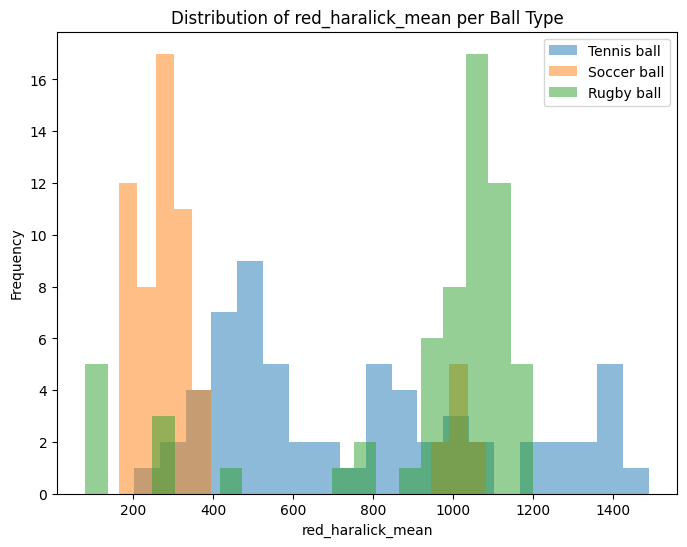

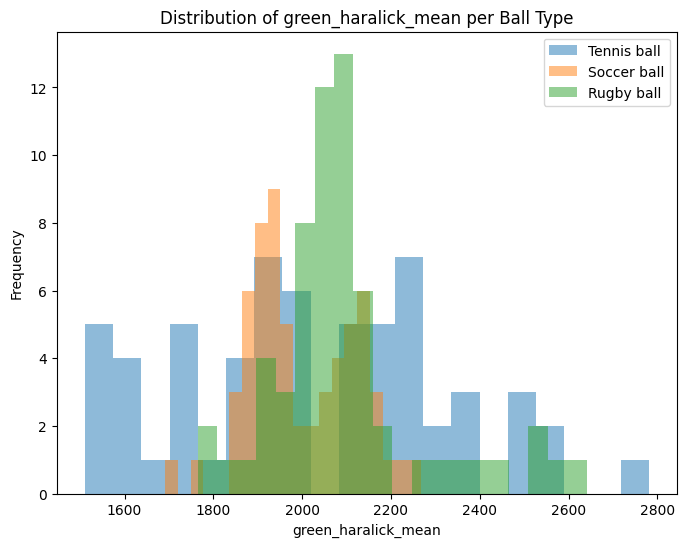

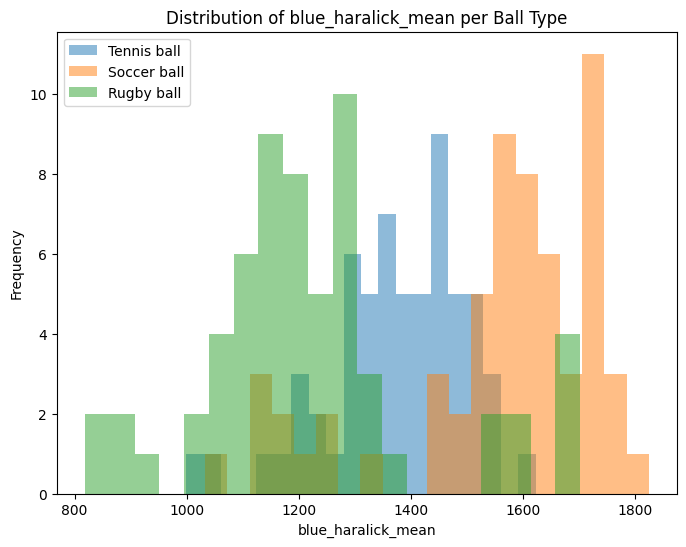

In [6]:
import os
import cv2
import numpy as np
import mahotas as mh
from scipy.stats import describe  # Import describe function from scipy.stats
import matplotlib.pyplot as plt

# Paths to extracted patches directory
extracted_patches_dir = r'C:\Users\E-TIME\extracted_patches'

# Function to calculate GLCM features for a patch
def calculate_glcm_features(patch):
    glcm = mh.features.haralick(patch.astype(np.uint8), return_mean=True, ignore_zeros=True)
    return glcm.ravel()

# Function to calculate Haralick features for a patch
def calculate_haralick_features(patch):
    glcm_features = calculate_glcm_features(patch)
    haralick_features = {}
    for i, feature_value in enumerate(glcm_features):
        haralick_features[f'haralick_{i}'] = feature_value
    return haralick_features

# Function to compute texture features for patches
def compute_texture_features(patches):
    texture_features = []
    for patch in patches:
        patch_features = {}
        color_channels = ['red', 'green', 'blue']
        for channel in color_channels:
            channel_index = {'red': 0, 'green': 1, 'blue': 2}[channel]
            channel_patch = patch[:,:,channel_index]
            haralick_features = calculate_haralick_features(channel_patch)
            for key, value in haralick_features.items():
                patch_features[f'{channel}_{key}'] = value
        texture_features.append(patch_features)
    return texture_features

# Function to aggregate features by calculating average and range
def aggregate_features(texture_features):
    aggregated_features = []
    for patch_features in texture_features:
        aggregated_patch_features = {}
        color_channels = ['red', 'green', 'blue']
        for channel in color_channels:
            channel_features = [patch_features[f'{channel}_haralick_{i}'] for i in range(13)]  # 13 features per channel
            channel_describe = describe(channel_features)
            aggregated_patch_features[f'{channel}_haralick_mean'] = channel_describe.mean
            aggregated_patch_features[f'{channel}_haralick_range'] = channel_describe.minmax[1] - channel_describe.minmax[0]
        aggregated_features.append(aggregated_patch_features)
    return aggregated_features

# Function to select one feature from each color channel
def select_features(aggregated_features):
    selected_features = []
    for patch_features in aggregated_features:
        selected_patch_features = {}
        color_channels = ['red', 'green', 'blue']
        for channel in color_channels:
            selected_patch_features[f'{channel}_haralick_mean'] = patch_features[f'{channel}_haralick_mean']
        selected_features.append(selected_patch_features)
    return selected_features

# Load extracted patches
patches = []
for filename in os.listdir(extracted_patches_dir):
    if filename.endswith('.png'):
        patch_path = os.path.join(extracted_patches_dir, filename)
        patch = cv2.imread(patch_path)
        patches.append(patch)

# Compute texture features for patches
texture_features = compute_texture_features(patches)

# Aggregate features by calculating average and range
aggregated_features = aggregate_features(texture_features)

# Select one feature from each color channel
selected_features = select_features(aggregated_features)

# Convert selected features to a numpy array
selected_feature_matrix = np.array([[patch_features[name] for name in selected_features[0].keys()] for patch_features in selected_features])

# Define ball type labels
ball_types = ['Tennis ball', 'Soccer ball', 'Rugby ball']

# Plot distribution of selected features per ball type
selected_feature_names = list(selected_features[0].keys())
for feature_name in selected_feature_names:
    plt.figure(figsize=(8, 6))
    for ball_type in ball_types:
        ball_features = selected_feature_matrix[ball_types.index(ball_type)::len(ball_types), selected_feature_names.index(feature_name)]
        plt.hist(ball_features, bins=20, alpha=0.5, label=ball_type)
    plt.xlabel(feature_name)
    plt.ylabel('Frequency')
    plt.title(f'Distribution of {feature_name} per Ball Type')
    plt.legend()
    plt.show()


In [ ]:
# TASK 3 Start Here

In [71]:
import numpy as np

# File paths
na_file = 'C:/Users/E-TIME/Desktop/na.csv'
nb_file = 'C:/Users/E-TIME/Desktop/nb.csv'
x_file = 'C:/Users/E-TIME/Desktop/x.csv'
y_file = 'C:/Users/E-TIME/Desktop/y.csv'

# Load data from CSV files
na_data = np.loadtxt(na_file, delimiter=',')
nb_data = np.loadtxt(nb_file, delimiter=',')
x_data = np.loadtxt(x_file, delimiter=',')
y_data = np.loadtxt(y_file, delimiter=',')

# Print first few rows of each file to inspect the data
print("na.csv:")
print(na_data[:5])
print("\nnb.csv:")
print(nb_data[:5])
print("\nx.csv:")
print(x_data[:5])
print("\ny.csv:")
print(y_data[:5])


na.csv:
[ 41.308   73.6138 109.8999 140.5836 165.9243]

nb.csv:
[482.0221 468.7403 461.1242 470.7078 457.6026]

x.csv:
[ 39.9937  71.9831 106.0174 135.9831 164.9602]

y.csv:
[474.9883 472.9946 467.9945 465.9944 463.9433]


# TASK 3 PART (a) 

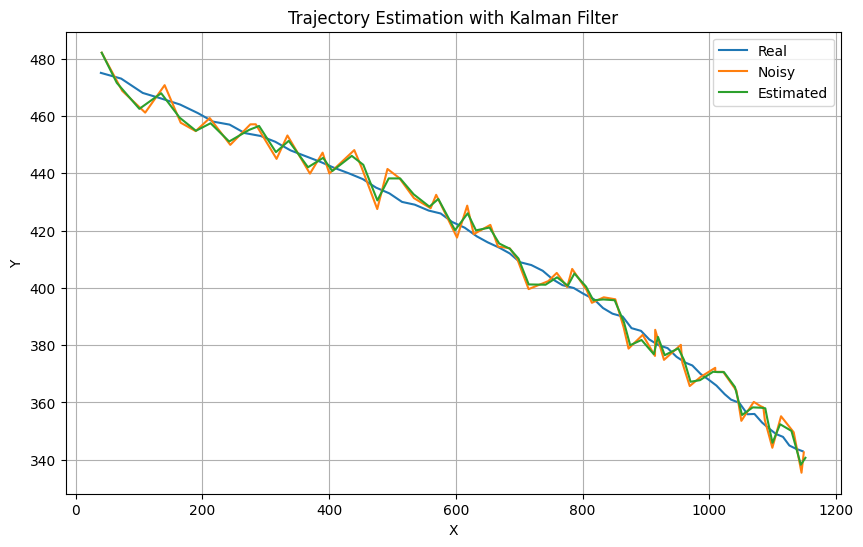

In [76]:
import numpy as np
import matplotlib.pyplot as plt

# File paths
na_file = 'C:/Users/E-TIME/Desktop/na.csv'
nb_file = 'C:/Users/E-TIME/Desktop/nb.csv'
x_file = 'C:/Users/E-TIME/Desktop/x.csv'
y_file = 'C:/Users/E-TIME/Desktop/y.csv'

# Load data from CSV files
na_data = np.loadtxt(na_file, delimiter=',')
nb_data = np.loadtxt(nb_file, delimiter=',')
x_data = np.loadtxt(x_file, delimiter=',')
y_data = np.loadtxt(y_file, delimiter=',')

# Constant velocity motion model matrix
F = np.array([[1, 0, 0.5, 0],
              [0, 1, 0, 0.5],
              [0, 0, 1, 0],
              [0, 0, 0, 1]])

# Observation model matrix
H = np.array([[1, 0, 0, 0],
              [0, 1, 0, 0]])

# Covariance matrix of process noise
Q = np.array([[0.16, 0, 0, 0],
              [0, 0.36, 0, 0],
              [0, 0, 0.16, 0],
              [0, 0, 0, 0.36]])

# Covariance matrix of measurement noise
R = np.array([[0.25, 0],
              [0, 0.25]])

def kalman_filter(measurements):
    # Initial state estimate
    x = np.array([measurements[0][0], measurements[0][1], 0, 0])
    
    # Initial covariance matrix
    P = np.eye(4)
    
    estimated_trajectory = []
    
    for measurement in measurements:
        # Prediction step
        x = np.dot(F, x)
        P = np.dot(F, np.dot(P, F.T)) + Q
        
        # Update step
        y = measurement - np.dot(H, x)
        S = np.dot(H, np.dot(P, H.T)) + R
        K = np.dot(P, np.dot(H.T, np.linalg.inv(S)))
        x = x + np.dot(K, y)
        P = P - np.dot(K, np.dot(H, P))
        
        # Save estimated position for plotting
        estimated_trajectory.append((x[0], x[1]))
    
    return estimated_trajectory

# Combine noisy measurements into a list of tuples
noisy_measurements = list(zip(na_data, nb_data))

# Run Kalman filter
estimated_trajectory = kalman_filter(noisy_measurements)

# Plot results
plt.figure(figsize=(10, 6))
plt.plot(x_data, y_data, label='Real')
plt.plot([m[0] for m in noisy_measurements], [m[1] for m in noisy_measurements], label='Noisy')
plt.plot([est[0] for est in estimated_trajectory], [est[1] for est in estimated_trajectory], label='Estimated')
plt.xlabel('X')
plt.ylabel('Y')
plt.title('Trajectory Estimation with Kalman Filter')
plt.legend()
plt.grid(True)
plt.show()


# TASK 3 PART (b)

RMSE X: 4.146163941705793
RMSE Y: 4.101219391449164
RMSE: 5.831867276293243


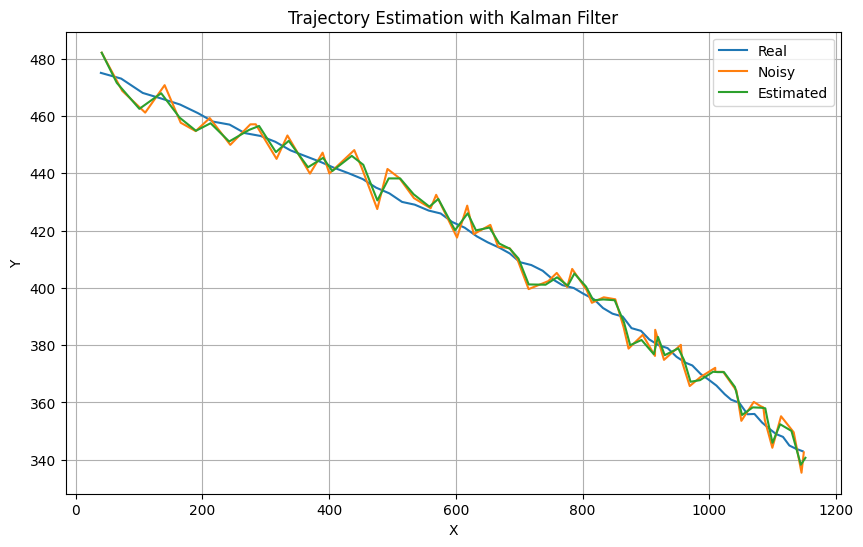

In [77]:
import numpy as np
import matplotlib.pyplot as plt

# File paths
na_file = 'C:/Users/E-TIME/Desktop/na.csv'
nb_file = 'C:/Users/E-TIME/Desktop/nb.csv'
x_file = 'C:/Users/E-TIME/Desktop/x.csv'
y_file = 'C:/Users/E-TIME/Desktop/y.csv'

# Load data from CSV files
na_data = np.loadtxt(na_file, delimiter=',')
nb_data = np.loadtxt(nb_file, delimiter=',')
x_data = np.loadtxt(x_file, delimiter=',')
y_data = np.loadtxt(y_file, delimiter=',')

# Constant velocity motion model matrix
F = np.array([[1, 0, 0.5, 0],
              [0, 1, 0, 0.5],
              [0, 0, 1, 0],
              [0, 0, 0, 1]])

# Observation model matrix
H = np.array([[1, 0, 0, 0],
              [0, 1, 0, 0]])

# Covariance matrix of process noise
Q = np.array([[0.16, 0, 0, 0],
              [0, 0.36, 0, 0],
              [0, 0, 0.16, 0],
              [0, 0, 0, 0.36]])

# Covariance matrix of measurement noise
R = np.array([[0.25, 0],
              [0, 0.25]])

def kalman_filter(measurements, Q, R):
    # Initial state estimate
    x = np.array([measurements[0][0], measurements[0][1], 0, 0])
    
    # Initial covariance matrix
    P = np.eye(4)
    
    estimated_trajectory = []
    
    for measurement in measurements:
        # Prediction step
        x = np.dot(F, x)
        P = np.dot(F, np.dot(P, F.T)) + Q
        
        # Update step
        y = measurement - np.dot(H, x)
        S = np.dot(H, np.dot(P, H.T)) + R
        K = np.dot(P, np.dot(H.T, np.linalg.inv(S)))
        x = x + np.dot(K, y)
        P = P - np.dot(K, np.dot(H, P))
        
        # Save estimated position for plotting
        estimated_trajectory.append((x[0], x[1]))
    
    return estimated_trajectory

# Combine noisy measurements into a list of tuples
noisy_measurements = list(zip(na_data, nb_data))

# Run Kalman filter
estimated_trajectory = kalman_filter(noisy_measurements, Q, R)

# Calculate RMSE
rmse_x = np.sqrt(np.mean((x_data - np.array([est[0] for est in estimated_trajectory]))**2))
rmse_y = np.sqrt(np.mean((y_data - np.array([est[1] for est in estimated_trajectory]))**2))
rmse = np.sqrt(rmse_x**2 + rmse_y**2)

print("RMSE X:", rmse_x)
print("RMSE Y:", rmse_y)
print("RMSE:", rmse)

# Plot results
plt.figure(figsize=(10, 6))
plt.plot(x_data, y_data, label='Real')
plt.plot([m[0] for m in noisy_measurements], [m[1] for m in noisy_measurements], label='Noisy')
plt.plot([est[0] for est in estimated_trajectory], [est[1] for est in estimated_trajectory], label='Estimated')
plt.xlabel('X')
plt.ylabel('Y')
plt.title('Trajectory Estimation with Kalman Filter')
plt.legend()
plt.grid(True)
plt.show()


# ADJUSTED PARAMETERS FOR Q AND R

RMSE X (Adjusted): 4.255896900960166
RMSE Y (Adjusted): 3.9237726741719996
RMSE (Adjusted): 5.788665686510254


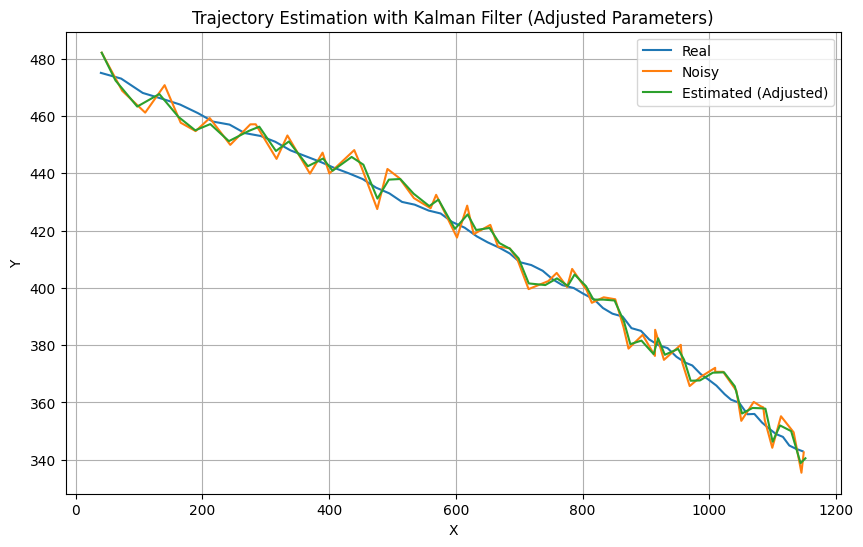

In [78]:
import numpy as np
import matplotlib.pyplot as plt

# File paths
na_file = 'C:/Users/E-TIME/Desktop/na.csv'
nb_file = 'C:/Users/E-TIME/Desktop/nb.csv'
x_file = 'C:/Users/E-TIME/Desktop/x.csv'
y_file = 'C:/Users/E-TIME/Desktop/y.csv'

# Load data from CSV files
na_data = np.loadtxt(na_file, delimiter=',')
nb_data = np.loadtxt(nb_file, delimiter=',')
x_data = np.loadtxt(x_file, delimiter=',')
y_data = np.loadtxt(y_file, delimiter=',')

# Constant velocity motion model matrix
F = np.array([[1, 0, 0.5, 0],
              [0, 1, 0, 0.5],
              [0, 0, 1, 0],
              [0, 0, 0, 1]])

# Observation model matrix
H = np.array([[1, 0, 0, 0],
              [0, 1, 0, 0]])

# Covariance matrix of process noise (adjusted)
Q_adjusted = np.array([[0.25, 0, 0, 0],
                       [0, 0.5, 0, 0],
                       [0, 0, 0.25, 0],
                       [0, 0, 0, 0.5]])

# Covariance matrix of measurement noise (adjusted)
R_adjusted = np.array([[0.5, 0],
                       [0, 0.5]])

def kalman_filter(measurements, Q, R):
    # Initial state estimate
    x = np.array([measurements[0][0], measurements[0][1], 0, 0])
    
    # Initial covariance matrix
    P = np.eye(4)
    
    estimated_trajectory = []
    
    for measurement in measurements:
        # Prediction step
        x = np.dot(F, x)
        P = np.dot(F, np.dot(P, F.T)) + Q
        
        # Update step
        y = measurement - np.dot(H, x)
        S = np.dot(H, np.dot(P, H.T)) + R
        K = np.dot(P, np.dot(H.T, np.linalg.inv(S)))
        x = x + np.dot(K, y)
        P = P - np.dot(K, np.dot(H, P))
        
        # Save estimated position for plotting
        estimated_trajectory.append((x[0], x[1]))
    
    return estimated_trajectory

# Combine noisy measurements into a list of tuples
noisy_measurements = list(zip(na_data, nb_data))

# Run Kalman filter with adjusted parameters
estimated_trajectory_adjusted = kalman_filter(noisy_measurements, Q_adjusted, R_adjusted)

# Calculate RMSE with adjusted parameters
rmse_x_adjusted = np.sqrt(np.mean((x_data - np.array([est[0] for est in estimated_trajectory_adjusted]))**2))
rmse_y_adjusted = np.sqrt(np.mean((y_data - np.array([est[1] for est in estimated_trajectory_adjusted]))**2))
rmse_adjusted = np.sqrt(rmse_x_adjusted**2 + rmse_y_adjusted**2)

print("RMSE X (Adjusted):", rmse_x_adjusted)
print("RMSE Y (Adjusted):", rmse_y_adjusted)
print("RMSE (Adjusted):", rmse_adjusted)

# Plot results
plt.figure(figsize=(10, 6))
plt.plot(x_data, y_data, label='Real')
plt.plot([m[0] for m in noisy_measurements], [m[1] for m in noisy_measurements], label='Noisy')
plt.plot([est[0] for est in estimated_trajectory_adjusted], [est[1] for est in estimated_trajectory_adjusted], label='Estimated (Adjusted)')
plt.xlabel('X')
plt.ylabel('Y')
plt.title('Trajectory Estimation with Kalman Filter (Adjusted Parameters)')
plt.legend()
plt.grid(True)
plt.show()
